## MINI PROJECT : RETAIL TRANSACTIONS
## Kelompok 3
1. Claudia Venesiatan
2. Sela Tri Indah Sari
3. Luthfi Sifa Khaerunnisa
4. Fahryan Putra Ramadi
5. Ngurah Gede Ivan Satya Wibawa

In [449]:
#import libraries
import numpy as np
import pandas as pd

# import visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [451]:
# load data from local file
df = pd.read_csv("data/Retail_Transactions_Dataset.csv")

## Data Quality Assessment

In [455]:
# Show Upper Data
df.head()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [457]:
# Show Bottom Data
df.tail()

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
999995,1000999995,2023-03-27 06:12:10,Lisa Gonzalez,"['Pickles', 'Carrots', 'Peanut Butter', 'Spong...",1,22.07,Debit Card,Los Angeles,Supermarket,False,Middle-Aged,Winter,NaN
999996,1000999996,2022-05-19 05:13:58,Emily Graham,['Cereal'],8,80.25,Cash,Houston,Warehouse Club,True,Senior Citizen,Spring,Discount on Selected Items
999997,1000999997,2021-09-03 13:59:39,Cynthia Anderson,['Trash Bags'],3,60.74,Credit Card,Los Angeles,Convenience Store,False,Homemaker,Winter,NaN
999998,1000999998,2023-10-17 05:50:40,Michael Rodriguez,"['Diapers', 'Coffee', 'Coffee', 'Mop']",3,23.48,Debit Card,San Francisco,Supermarket,True,Retiree,Winter,BOGO (Buy One Get One)
999999,1000999999,2020-06-15 11:58:49,Jennifer Davis,"['Trash Cans', 'Mop', 'Jam']",8,44.12,Credit Card,Atlanta,Pharmacy,False,Professional,Fall,Discount on Selected Items


In [459]:
# Check Number of Row and Columns
df.shape

(1000000, 13)

In [461]:
# Show info (Data Type before transforming)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


In [462]:
# Check Documentation
df.info?

Signature:
df.info(
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
) -> 'None'
Docstring:
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

Parameters
----------
verbose : bool, optional
    Whether to print the full summary. By default, the setting in
    ``pandas.options.display.max_info_columns`` is followed.
buf : writable buffer, defaults to sys.stdout
    Where to send the output. By default, the output is printed to
    sys.stdout. Pass a writable buffer if you need to further process
    the output.
max_cols : int, optional
    When to switch from the verbose to the truncated output. If the
    DataFrame has more than `max_cols` columns, the truncated output
    is used. By default, the setting in
    ``pandas.options

In [465]:
# Show Missing
df.isna().sum()

Transaction_ID            0
Date                      0
Customer_Name             0
Product                   0
Total_Items               0
Total_Cost                0
Payment_Method            0
City                      0
Store_Type                0
Discount_Applied          0
Customer_Category         0
Season                    0
Promotion            333943
dtype: int64

## Data Type Transformation

In [468]:
#data type before transforming
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Transaction_ID     1000000 non-null  int64  
 1   Date               1000000 non-null  object 
 2   Customer_Name      1000000 non-null  object 
 3   Product            1000000 non-null  object 
 4   Total_Items        1000000 non-null  int64  
 5   Total_Cost         1000000 non-null  float64
 6   Payment_Method     1000000 non-null  object 
 7   City               1000000 non-null  object 
 8   Store_Type         1000000 non-null  object 
 9   Discount_Applied   1000000 non-null  bool   
 10  Customer_Category  1000000 non-null  object 
 11  Season             1000000 non-null  object 
 12  Promotion          666057 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 92.5+ MB


In [470]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [472]:
# Convert relevant columns to category type
categorical_columns = ['Customer_Category', 'Store_Type', 'City', 'Payment_Method', 'Season', 'Promotion']
df[categorical_columns] = df[categorical_columns].astype('category')

In [473]:
#data type after transforming
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Transaction_ID     1000000 non-null  int64         
 1   Date               1000000 non-null  datetime64[ns]
 2   Customer_Name      1000000 non-null  object        
 3   Product            1000000 non-null  object        
 4   Total_Items        1000000 non-null  int64         
 5   Total_Cost         1000000 non-null  float64       
 6   Payment_Method     1000000 non-null  category      
 7   City               1000000 non-null  category      
 8   Store_Type         1000000 non-null  category      
 9   Discount_Applied   1000000 non-null  bool          
 10  Customer_Category  1000000 non-null  category      
 11  Season             1000000 non-null  category      
 12  Promotion          666057 non-null   category      
dtypes: bool(1), category(6), dat

## Handling Missing Value

In [477]:
# Detect Missing Value Percentage
missing_values = df.isnull().sum()
total_values = df.shape[0]

percentage_missing = round((missing_values / total_values) * 100, 2)

print(percentage_missing)

Transaction_ID        0.00
Date                  0.00
Customer_Name         0.00
Product               0.00
Total_Items           0.00
Total_Cost            0.00
Payment_Method        0.00
City                  0.00
Store_Type            0.00
Discount_Applied      0.00
Customer_Category     0.00
Season                0.00
Promotion            33.39
dtype: float64


In [479]:
# Copy Dataset
df1 = df.copy()

In [481]:
# Check Number of Row
df1.shape

(1000000, 13)

In [483]:
# Show The Descriptive Stats (promotion)
df1['Promotion'].describe()

count                         666057
unique                             2
top       Discount on Selected Items
freq                          333370
Name: Promotion, dtype: object

In [485]:
# Handling Missing Values (promotion)
mode_value = df['Promotion'].mode()[0]
df['Promotion'].fillna(mode_value, inplace=True)

In [487]:
df.isnull().sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

## Detecting and Handling outliers 

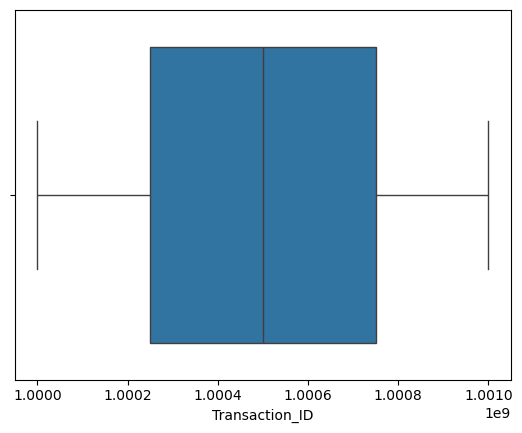

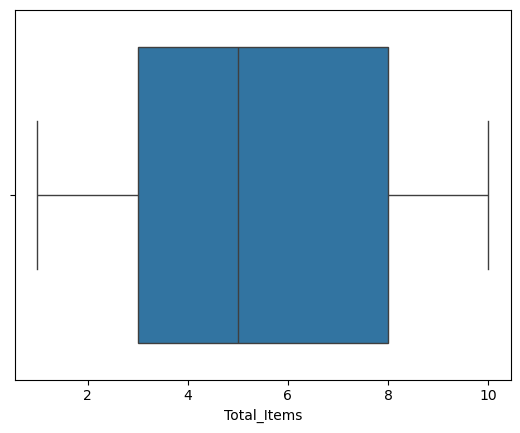

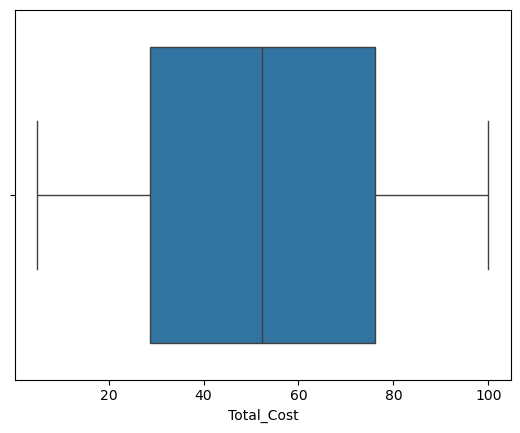

In [490]:
## Detecting Outlier by visualization using Boxplot
df1_num = df1.select_dtypes(include=["int64", "float64"])
for i in df1_num:
    sns.boxplot(data=df1_num, x = i)
    plt.show()

In [492]:
## detecting outlier using Z-Score Method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in Total_Items, Total_Cost, and Transaction ID
outliers_total_items = detect_outliers_iqr(df, "Total_Items")
outliers_total_cost = detect_outliers_iqr(df, "Total_Cost")
outliers_transaction_id = detect_outliers_iqr(df, "Transaction_ID")

print("Outliers in Total_Items:")
print(outliers_total_items)

print("\nOutliers in Total_Cost:")
print(outliers_total_cost)

print("\nOutliers in Transaction_ID:")
print(outliers_transaction_id)

Outliers in Total_Items:
Empty DataFrame
Columns: [Transaction_ID, Date, Customer_Name, Product, Total_Items, Total_Cost, Payment_Method, City, Store_Type, Discount_Applied, Customer_Category, Season, Promotion]
Index: []

Outliers in Total_Cost:
Empty DataFrame
Columns: [Transaction_ID, Date, Customer_Name, Product, Total_Items, Total_Cost, Payment_Method, City, Store_Type, Discount_Applied, Customer_Category, Season, Promotion]
Index: []

Outliers in Transaction_ID:
Empty DataFrame
Columns: [Transaction_ID, Date, Customer_Name, Product, Total_Items, Total_Cost, Payment_Method, City, Store_Type, Discount_Applied, Customer_Category, Season, Promotion]
Index: []


In [494]:
## detecting outlier using Interquartile Range (IQR) Method
# Define a function to detect outliers using IQR for each numeric column
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return a boolean series indicating the presence of outliers
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply the function to numeric columns to detect outliers
numeric_columns = ["Total_Items", "Total_Cost", "Transaction_ID"] 
for col in numeric_columns:
    df[f"{col}_Outlier"] = detect_outliers_iqr(df, col)

# View rows with outliers in Total_Items, Total_Cost, and Transaction_ID
outliers_df = df[(df["Total_Items_Outlier"]) | (df["Total_Cost_Outlier"]) | (df["Transaction_ID_Outlier"])][["Transaction_ID", "Transaction_ID_Outlier", "Total_Items", "Total_Items_Outlier", "Total_Cost", "Total_Cost_Outlier"]]
print(outliers_df)


Empty DataFrame
Columns: [Transaction_ID, Transaction_ID_Outlier, Total_Items, Total_Items_Outlier, Total_Cost, Total_Cost_Outlier]
Index: []


In [496]:
# Count outliers in Total_Items, Total_Cost, and Transaction_ID
total_outliers_items = df["Total_Items_Outlier"].sum()
total_outliers_cost = df["Total_Cost_Outlier"].sum()
total_outliers_transaction_id = df["Transaction_ID_Outlier"].sum()

print(f"Number of outliers in Total_Items: {total_outliers_items}")
print(f"Number of outliers in Total_Cost: {total_outliers_cost}")
print(f"Number of outliers in Transaction_ID: {total_outliers_transaction_id}")


Number of outliers in Total_Items: 0
Number of outliers in Total_Cost: 0
Number of outliers in Transaction_ID: 0


In [498]:
# Filter to check if there are any remaining outliers
remaining_outliers_df = df[(df["Total_Items_Outlier"]) | (df["Total_Cost_Outlier"]) | (df["Transaction_ID_Outlier"])]

# Display remaining outliers if any exist
if not remaining_outliers_df.empty:
    print("Remaining Outliers:")
    print(remaining_outliers_df[["Total_Items", "Total_Items_Outlier", "Total_Cost", "Total_Cost_Outlier", "Transaction_ID", "Transaction_ID_Outlier"]])
else:
    print("No remaining outliers found in the dataset.")


No remaining outliers found in the dataset.


### Z-Score Method

In [501]:
# detecting outlier using Z-score
from scipy.stats import zscore

In [503]:
# Calculate Z-score for Total_items, Total_Cost, and Transaction_ID
df["Total_Items_Z"] = zscore(df["Total_Items"])
df["Total_Cost_Z"] = zscore(df["Total_Cost"])
df["Transaction_ID_Z"] = zscore(df["Transaction_ID"])

In [505]:
# Define Z-score threshold for outliers
z_threshold = 3

In [507]:
# Identify outliers
outliers_total_items_z = df[df['Total_Items_Z'].abs() > z_threshold]
outliers_total_cost_z = df[df['Total_Cost_Z'].abs() > z_threshold]
outliers_transaction_id_z = df[df['Transaction_ID_Z'].abs() > z_threshold]

In [509]:
print("Z-score Outliers in Total_Items:")
print(outliers_total_items_z[["Total_Items", "Total_Items_Z"]])

Z-score Outliers in Total_Items:
Empty DataFrame
Columns: [Total_Items, Total_Items_Z]
Index: []


In [511]:
print("Z-score Outliers in Total_Cost:")
print(outliers_total_items_z[["Total_Cost", "Total_Cost_Z"]])

Z-score Outliers in Total_Cost:
Empty DataFrame
Columns: [Total_Cost, Total_Cost_Z]
Index: []


In [513]:
print("Z-score Outliers in Transaction_ID:")
print(outliers_total_cost_z[["Transaction_ID", "Transaction_ID_Z"]])

Z-score Outliers in Transaction_ID:
Empty DataFrame
Columns: [Transaction_ID, Transaction_ID_Z]
Index: []


### Interquartile Range Method (IQR)

In [516]:
# detecting outlier using Interquartile Range (IQR) Method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.24)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [518]:
# Detect outliers in Total_items, Total_cost, and Transaction ID
outliers_total_items = detect_outliers_iqr(df, "Total_Items")
outliers_total_cost = detect_outliers_iqr(df, "Total_Cost")
outliers_transaction_id = detect_outliers_iqr(df, "Transaction_ID")

In [520]:
print("Outliers in Total_Items:")
print(outliers_total_items)

Outliers in Total_Items:
Empty DataFrame
Columns: [Transaction_ID, Date, Customer_Name, Product, Total_Items, Total_Cost, Payment_Method, City, Store_Type, Discount_Applied, Customer_Category, Season, Promotion, Total_Items_Outlier, Total_Cost_Outlier, Transaction_ID_Outlier, Total_Items_Z, Total_Cost_Z, Transaction_ID_Z]
Index: []


In [522]:
print("Outliers in Total_Cost:")
print(outliers_total_cost)

Outliers in Total_Cost:
Empty DataFrame
Columns: [Transaction_ID, Date, Customer_Name, Product, Total_Items, Total_Cost, Payment_Method, City, Store_Type, Discount_Applied, Customer_Category, Season, Promotion, Total_Items_Outlier, Total_Cost_Outlier, Transaction_ID_Outlier, Total_Items_Z, Total_Cost_Z, Transaction_ID_Z]
Index: []


In [524]:
print("Outliers in Transaction_ID:")
print(outliers_transaction_id)

Outliers in Transaction_ID:
Empty DataFrame
Columns: [Transaction_ID, Date, Customer_Name, Product, Total_Items, Total_Cost, Payment_Method, City, Store_Type, Discount_Applied, Customer_Category, Season, Promotion, Total_Items_Outlier, Total_Cost_Outlier, Transaction_ID_Outlier, Total_Items_Z, Total_Cost_Z, Transaction_ID_Z]
Index: []


### Detecting And Handling The Outlier

In [527]:
## detecting outlier using Interquartile Range (IQR) Method
# Define a function to detect outliers using IQR for each numeric column
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return a boolean series indicating the presence of outliers
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Apply the function to numeric columns to detect outliers
numeric_columns = ["Total_Items", "Total_Cost", "Transaction_ID"] 
for col in numeric_columns:
    df[f"{col}_Outlier"] = detect_outliers_iqr(df, col)

# View rows with outliers in Total_Items, Total_Cost, and Transaction_ID
outliers_df = df[(df["Total_Items_Outlier"]) | (df["Total_Cost_Outlier"]) | (df["Transaction_ID_Outlier"])][["Transaction_ID", "Transaction_ID_Outlier", "Total_Items", "Total_Items_Outlier", "Total_Cost", "Total_Cost_Outlier"]]
print(outliers_df)


Empty DataFrame
Columns: [Transaction_ID, Transaction_ID_Outlier, Total_Items, Total_Items_Outlier, Total_Cost, Total_Cost_Outlier]
Index: []


In [529]:
# Count outliers in Total_Items, Total_Cost, and Transaction_ID
total_outliers_items = df["Total_Items_Outlier"].sum()
total_outliers_cost = df["Total_Cost_Outlier"].sum()
total_outliers_transaction_id = df["Transaction_ID_Outlier"].sum()

print(f"Number of outliers in Total_Items: {total_outliers_items}")
print(f"Number of outliers in Total_Cost: {total_outliers_cost}")
print(f"Number of outliers in Transaction_ID: {total_outliers_transaction_id}")

Number of outliers in Total_Items: 0
Number of outliers in Total_Cost: 0
Number of outliers in Transaction_ID: 0


In [531]:
# Filter to check if there are any remaining outliers
remaining_outliers_df = df[(df["Total_Items_Outlier"]) | (df["Total_Cost_Outlier"]) | (df["Transaction_ID_Outlier"])]

# Display remaining outliers if any exist
if not remaining_outliers_df.empty:
    print("Remaining Outliers:")
    print(remaining_outliers_df[["Total_Items", "Total_Items_Outlier", "Total_Cost", "Total_Cost_Outlier", "Transaction_ID", "Transaction_ID_Outlier"]])
else:
    print("No remaining outliers found in the dataset.")


No remaining outliers found in the dataset.


### Descriptive Statistics

In [534]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [536]:
round(df.describe(),0)

,Transaction_ID,Date,Total_Items,Total_Cost,Total_Items_Z,Total_Cost_Z,Transaction_ID_Z
count,1.000000e+06,1000000,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0
mean,1.000500e+09,2022-03-10 21:46:28.440430080,5.0,52.0,-0.0,0.0,-0.0
min,1.000000e+09,2020-01-01 00:03:54,1.0,5.0,-2.0,-2.0,-2.0
25%,1.000250e+09,2021-02-03 23:15:59.249999872,3.0,29.0,-1.0,-1.0,-1.0
50%,1.000500e+09,2022-03-10 19:23:17.500000,5.0,52.0,-0.0,-0.0,0.0
75%,1.000750e+09,2023-04-14 23:06:37,8.0,76.0,1.0,1.0,1.0
max,1.001000e+09,2024-05-18 19:31:03,10.0,100.0,2.0,2.0,2.0
std,2.886750e+05,NaN,3.0,27.0,1.0,1.0,1.0


1. We can see from the table above there are 1.000.000 rows of data which means there are 1 million transaction in this dataset, ranging from index 0 to 999999
2. Now we take a look at the `Total_Items` column, the `mean` of `Total_Items` is `5`, that means in average the `Total_Items` that the customer bought in this dataset is around `5` items. While the minimum of `Total_Items` bought is `1`, which makes sense because you need atleast 1 item for purchase in order for that data to be stored in the data set. The maximum of `Total_Items` bought in this entire 1 million row of data is `10`.
3.  Atlast we can take a look at the `Total_Cost` column, the `mean` of `Total_Cost` is `52`, that means in average the `Total_Cost` that is spend by customer in this dataset is around `52` in currency. While minimum `Total_Cost` that is spend by 1 or more customer is `5` in currency. The maximum however is `100` in currency from the entire 1 million row of data.

In [539]:
df.describe(include=["object","category","bool"])

,Customer_Name,Product,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion,Total_Items_Outlier,Total_Cost_Outlier,Transaction_ID_Outlier
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,329738,571947,4,10,6,2,8,4,2,1,1,1
top,Michael Smith,['Toothpaste'],Cash,Boston,Supermarket,True,Senior Citizen,Spring,Discount on Selected Items,False,False,False
freq,454,4893,250230,100566,166936,500104,125485,250368,667313,1000000,1000000,1000000


1. We can see from the table above that there are `996337` `unique` `Customer_Name`, and the most frequent customer is `Michael Smith` with a frequency of `454` times in this 1 million rows of data.
2. Let's take a look at the `Product` column, the most frequent product that keeps being purchased is `['Toothpaste']` with a frequency of `4893` times.
3. While there are `4` `unique` `Payment_Method`, the most frequent payment method is `Cash` with `250230` times, which means that around 25% of the 1 million purchases were made using cash.
4. Now we can take a look at the `City` column, there are `10` `unique` cities in this dataset, and the most frequent city is `Boston` with a frequency of `100566` times.
5. Let's take a look at the `Store_Type` column, there are `6` `unique` `Store_Type` with the most frequent `Store_Type` being `Supermarket`, with a frequency of `166936` times.
6. The `Discount_Applied` has `2` unique (`True`/`False`), since its a bool data type and the most frequent is `True` with a frequency of `500104` times, which means around 50% of transactions were done with the discount applied.
7. The `Customer_Category` column has `8` `unique` categories, with the most frequent being `Senior Citizen` with `125485` occurrences, which means that around 12% of the 1 million purchases were done by Senior Citizen.
8. The `Season` column has `4` `unique` seasons, with the most frequent being `Spring` with `250368` occurrences, which means that around 25%% of the 1 million purchases were done in `Spring`.
9. The `Promotion` column has `3` `unique` promotions, with the most frequent being `None` with `333943` occurrences, which means that around 33%% of the 1 million purchases were without any promotion.

### Measures of Central Tendency

In [543]:
# Computing mean, and median to see the central tendency of each column
central_tendency = pd.DataFrame({
    'Mean': df.select_dtypes(exclude=["object", "bool", "category"]).mean(),
    'Median': df.select_dtypes(exclude=["object", "bool", "category"]).median()
})

print(central_tendency)

                                           Mean                      Median
Transaction_ID                     1000499999.5                1000499999.5
Date              2022-03-10 21:46:28.440430080  2022-03-10 19:23:17.500000
Total_Items                            5.495941                         5.0
Total_Cost                             52.45522                       52.42
Total_Items_Z                              -0.0                   -0.172702
Total_Cost_Z                                0.0                   -0.001285
Transaction_ID_Z                           -0.0                         0.0


We can describe data distribution based on its mean and median values.

- If `Median` = `Mean`: symmetrical distribution
- If `Median` > `Mean`: negative skew distribution
- If `Median` < `Mean`: positive skew distribution

1. We can see from the output above the column `Total_Items`'s `Median` is smaller than `Mean` value, which means this column have a positive skew distribution.
2. The `Total_Cost` column has roughly the same `Median` and `Mean` value, which means this column probably have a symmetrical distribution.

### Measures of Dispersion

In [547]:
df_num = df.select_dtypes(exclude=["object", "bool", "category"])
for i in df_num:
    try:
        print(i, "range from: ", df[i].min(), "to ", df[i].max(), ", ", f"{i} data spread : {df[i].max() - df[i].min()}")
    except:
        pass

Transaction_ID range from:  1000000000 to  1000999999 ,  Transaction_ID data spread : 999999
Date range from:  2020-01-01 00:03:54 to  2024-05-18 19:31:03 ,  Date data spread : 1599 days 19:27:09
Total_Items range from:  1 to  10 ,  Total_Items data spread : 9
Total_Cost range from:  5.0 to  100.0 ,  Total_Cost data spread : 95.0
Total_Items_Z range from:  -1.5656283643057198 to  1.5684553077779393 ,  Total_Items_Z data spread : 3.1340836720836593
Total_Cost_Z range from:  -1.7308700045827476 to  1.7341365647547975 ,  Total_Cost_Z data spread : 3.465006569337545
Transaction_ID_Z range from:  -1.732049075518936 to  1.732049075518936 ,  Transaction_ID_Z data spread : 3.464098151037872


From information above, we can see that the range of data on `Date` are spread around `2020-01-01` to `2024-05-18`, which means that the data is spread around `1599 days` in between those values, we can also see that the range of data on `Total_Items` are spread around `1` to `10`, which means that the data is spread around `9` in between those values. This indicates the variation or spread of the `Total_Items` data. While the `Total_Cost` range from `5.0` To  `100.0`, which means that the data is spread around `95` in between those values.

In [550]:
# computing the variance for each feature
df.select_dtypes(include=["int64", "float64"]).var()

Transaction_ID      8.333342e+10
Total_Items         8.246398e+00
Total_Cost          7.516913e+02
Total_Items_Z       1.000001e+00
Total_Cost_Z        1.000001e+00
Transaction_ID_Z    1.000001e+00
dtype: float64

In [552]:
# computing the standard deviation for each feature
df.select_dtypes(include=["int64", "float64"]).std()

Transaction_ID      288675.278933
Total_Items              2.871654
Total_Cost              27.416989
Total_Items_Z            1.000000
Total_Cost_Z             1.000001
Transaction_ID_Z         1.000001
dtype: float64

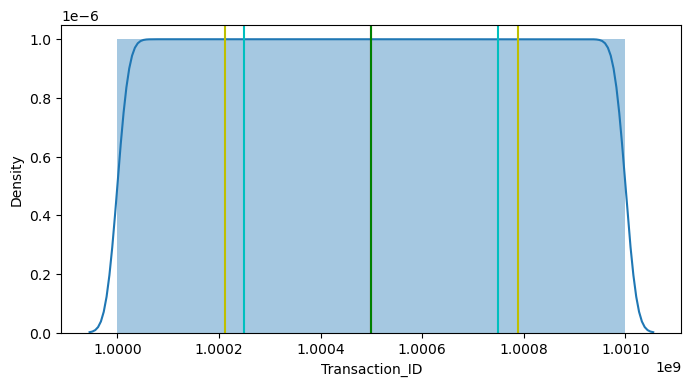

Q1 (Cyan): 1000249999.75 | Q3 (Cyan): 1000749999.25 | IQR:  499999.5


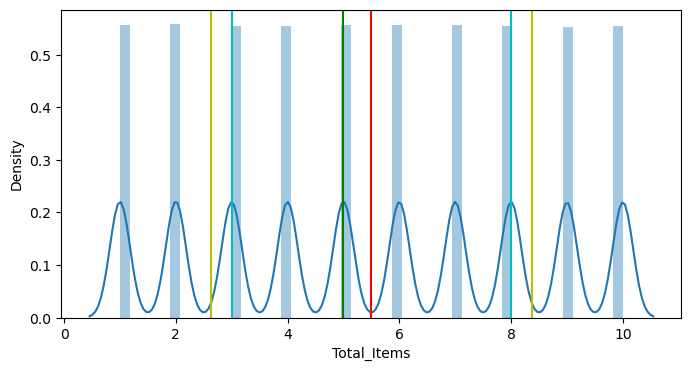

Q1 (Cyan): 3.0 | Q3 (Cyan): 8.0 | IQR:  5.0


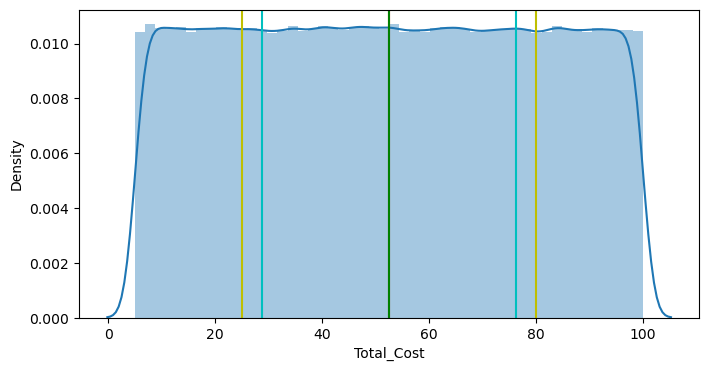

Q1 (Cyan): 28.71 | Q3 (Cyan): 76.19 | IQR:  47.48


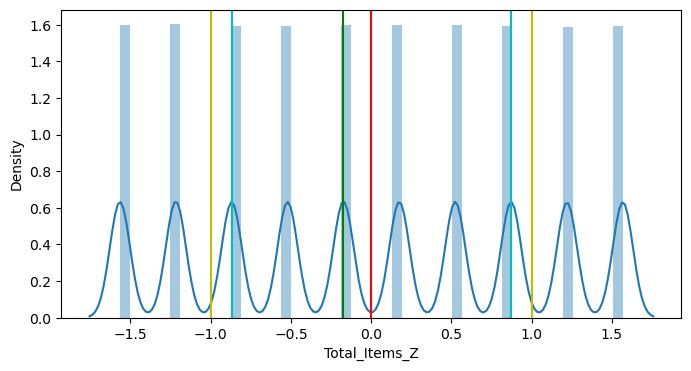

Q1 (Cyan): -0.8691653260649068 | Q3 (Cyan): 0.871992269537126 | IQR:  1.7411575956020329


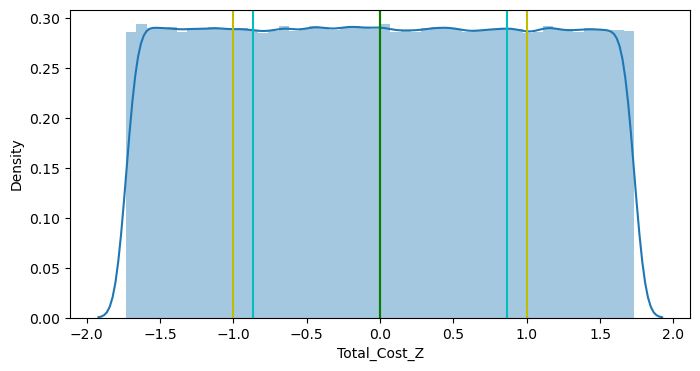

Q1 (Cyan): -0.8660773123828192 | Q3 (Cyan): 0.8656964972187243 | IQR:  1.7317738096015436


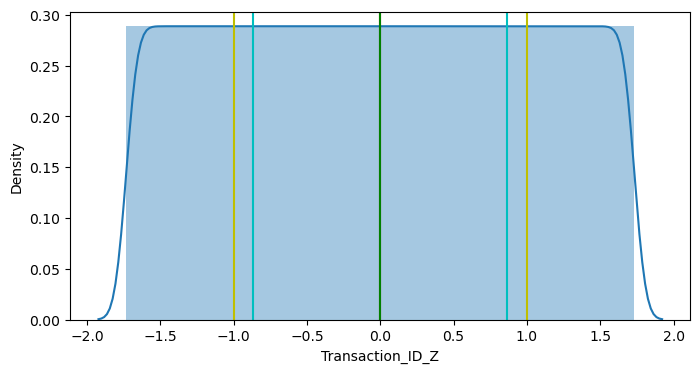

Q1 (Cyan): -0.866024537759468 | Q3 (Cyan): 0.866024537759468 | IQR:  1.732049075518936


In [554]:
# plot distribution
df_num = df.select_dtypes(include=["int64", "float64"])
for i in df_num:
    plt.figure(figsize = (8,4))
    sns.distplot(df_num[i])
    plt.axvline(df_num[i].mean(), color='r') # vertical
    plt.axvline(df_num[i].median(), color='g') # vertical
    plt.axvline(df_num[i].quantile(0.25), color='c') # vertical
    plt.axvline(df_num[i].quantile(0.75), color='c') # vertical
    plt.axvline((df_num[i].mean() - df_num[i].std()), color='y') # vertical
    plt.axvline((df_num[i].mean() + df_num[i].std()), color='y') # vertical
    plt.show()
    print("Q1 (Cyan):", df_num[i].quantile(0.25), "| Q3 (Cyan):", df_num[i].quantile(0.75), "| IQR: ", df_num[i].quantile(0.75) - df_num[i].quantile(0.25))

Plot above is a plot that show the distribution on each numeric column, with the values of `mean` and `median` are colored by red and green respectively, the colour cyan is the `quantile range`, while the yellow line indicates the spread of the data (if it's a normally distributed data). This means that if we pick a random values on one of the column, we will get a values between those yellow lines.

### Measure Of Shape

In [558]:
df_num.skew()

Transaction_ID     -2.511790e-15
Total_Items         1.557325e-03
Total_Cost          1.570532e-03
Total_Items_Z       1.557325e-03
Total_Cost_Z        1.570532e-03
Transaction_ID_Z    1.982701e-16
dtype: float64

- The skew() method calculates the skew for each column. From the information above, we can see that `Total_Items` and `Total_Cost` are having positive values (pos skewness), this indicates that these features are having a right tailed distribution. While `Transaction_ID`  has a negative values (neg skewness), this indicates a left tailed distribution.

In [561]:
df_num.kurtosis()  

Transaction_ID     -1.200000
Total_Items        -1.223532
Total_Cost         -1.198979
Total_Items_Z      -1.223532
Total_Cost_Z       -1.198979
Transaction_ID_Z   -1.200000
dtype: float64

- The kurtosis() method calculates the kurtosis for each column, The higher the value means the higher the height of the kurtosis and the lower the value means the higher the flatness of the kurtosis gets. From the information above, we can see that `Total_Items`, `Transaction_ID` and `Total_Cost` are having negative values, this indicates that these features probaly have a flat kurtosis (negative kurtosis)

### Correlation

<Axes: >

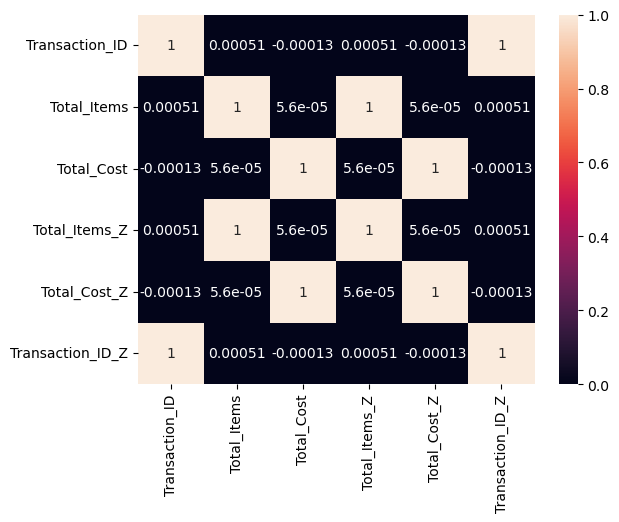

In [565]:
# visualizing with correlation matrix
sns.heatmap(df_num.corr(), annot=True)

From the visualization above, we can conclude: 
1. `Transaction_ID` and `Total_Items` have a weak or almost non positive correlation (`0.00051`), meaning that there are no relationship to `Total_Items` if the `Transaction_ID` increase.
2. `Transaction_ID` and `Total_Cost` have a weak or almost non negative correlation (`-0.00013`), meaning that there are no relationship to `Total_Cost` if the `Transaction_ID` increase.
3. `Total_Items` and `Total_Cost` have a weak or almost non positive correlation (`5.6e-05`), meaning that there are no relationship to `Total_Cost` if the `Total_Items` increase.

## SUMMARY

After analyzing the dataset, we conclude that there are no outliers in our dataset. Key observations include:

- Distribution Analysis:
The Total_Cost column appears to have a symmetrical distribution, as the median and mean values are approximately equal.

- Visualization Insights:
The distribution plots show mean (red) and median (green) values, with cyan representing the quantile range and yellow lines indicating the expected spread for normally distributed data.

- Skewness and Kurtosis:
Skew method reveals positive skewness for Total_Items and Total_Cost, indicating right-tailed distributions, while Transaction_ID shows negative skewness, indicating a left-tailed distribution.
For Kurtosis() method indicates that Total_Items, Transaction_ID, and Total_Cost have negative kurtosis, suggesting a flatter distribution.

- Correlation Analysis:
There is a weak or negligible correlation

Overall, the analysis suggests minimal relationships between the variables.